## Notebook d'exploration des données - Projet 2 - David Depouez

### 1. Généralités

Importation des modules et lecture du fichier de données

In [1]:
import pandas as pd
from matplotlib import pyplot as pl
import numpy as np

dfRaw = pd.read_csv('P2_DataClean.csv',low_memory=False)
dfRaw.head()

,code,product_name,categories_fr,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,carbohydrates_100g
13537,00170529,Welsh Slate Cavern Aged Cheddar,"Produits laitiers,Fromages,Fromages du Royaume...",3.0,1681.0,33.0,20.1,23.8,1.780,3.00
27419,0031506794322,Buffalo Wing,"Produits laitiers,Fromages,Fromages du Royaume...",4.0,1640.0,32.1,17.9,21.4,2.450,3.57
99796,0079813000118,Boursin Ail & Fines Herbes / Garlic & Fine Herbs,"Produits laitiers,Fromages,Fromages pasteurisés",3.0,1670.0,40.0,26.7,10.0,1.520,3.33
111081,0105400141270233103000350,Gouda vieux,"Produits laitiers,Fromages,Fromages de vache,F...",3.0,1684.0,33.8,22.3,25.5,2.286,0.00
111663,01483246,Mozzarella cheese ball,"Produits laitiers,Fromages,Fromages italiens,F...",2.0,1016.0,19.0,13.0,18.0,0.500,1.50


### 2. Analyse univarié

Le nutriscore est une variable qualitative on va la representer sur un diagramme en camembert

In [2]:
# Diagramme en secteurs
dfNutriScore = dfRaw.loc[:,'nutrition_grade_fr'].replace([0,1,2,3,4],['a','b','c','d','e'])

In [3]:
dfNutriScore.value_counts()

d    1544
c      99
e      77
b      10
a       1
Name: nutrition_grade_fr, dtype: int64

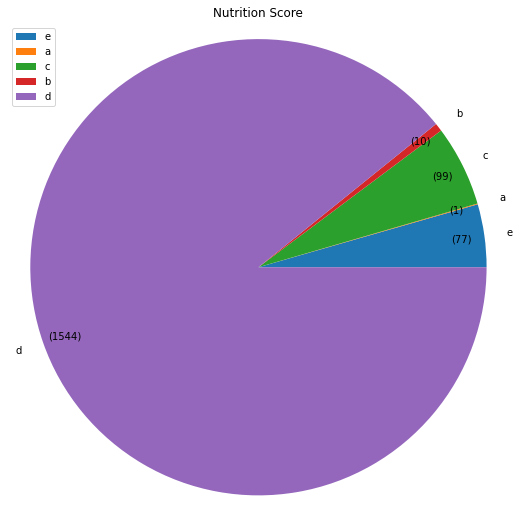

In [4]:
labels = ["e", "a", "c", "b", "d"]
#dfNutriScore.value_counts().reindex(labels).plot(kind='pie', figsize = (9,9), labeldistance=None, explode = [0.0, 0.0, 0.0, 0.0, 0.0],
 #           autopct=lambda p:'({:.0f})'.format((p/100)*dfNutriScore.value_counts().sum()), pctdistance = 0.9)
dfNutriScore.value_counts().reindex(labels).plot(kind='pie', figsize = (9,9), explode = [0.0, 0.0, 0.0, 0.0, 0.0],
            autopct=lambda p:'({:.0f})'.format((p/100)*dfNutriScore.value_counts().sum()), pctdistance = 0.9)

pl.title('Nutrition Score')
pl.axis('equal')
pl.ylabel(None)
pl.legend(loc='upper left')
pl.show()

In [5]:
# function to display histogram then dump statistical relevant values
def getHistogramme(dataFrame, name, title) :
    pl.xlabel(name)
    #pl.ylabel('Taux normalisé')
    pl.title(title)
    dataFrame[name].hist(density=True,grid=False,stacked=True)
    mean = dataFrame[name].mean()
    median = dataFrame[name].median()
    std = dataFrame[name].std()
    pl.axvline(x=mean,color='red',linestyle='-',label='moyenne')
    pl.axvline(x=median,color='green',linestyle='-',label='mediane')
    pl.legend()
    #print("{} : mean {:2.3} median {:2.3} std {:2.3} std/mean {:2.3}".format(name,mean, median, std, std/mean))
    return (mean, median, std)


On extrait le nom des colonnes des variables quantitatives

In [6]:
cols = dfRaw.columns.to_list()
cols = [name for i,name in enumerate(cols) if i > 3]

Pour chaque variable quantitative, on trace un histogramme avec les moyennes et medianes correspondantes

energy_100g


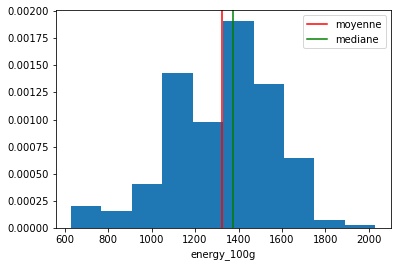

fat_100g


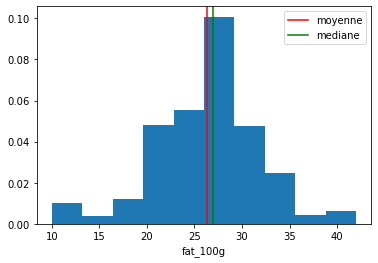

saturated-fat_100g


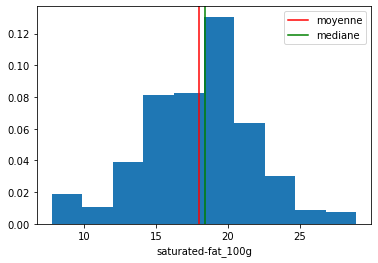

proteins_100g


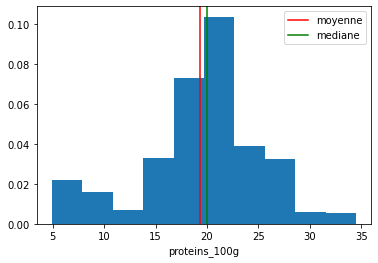

salt_100g


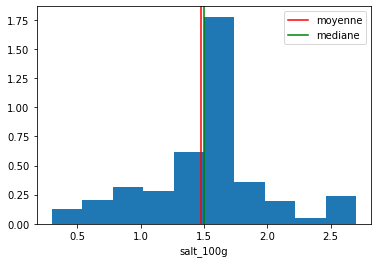

carbohydrates_100g


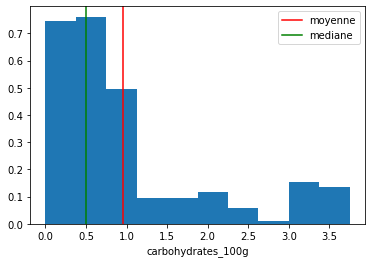

In [7]:
for i in cols :
    name = i
    print(name)
    getHistogramme(dfRaw,name,None)
    pl.show()
pl.show()

### 3. Analyse bivarié

Pour les variables quantitatives on va dessiner des nuages de points

Ici on represente l'énergie en fonction des autres variables.

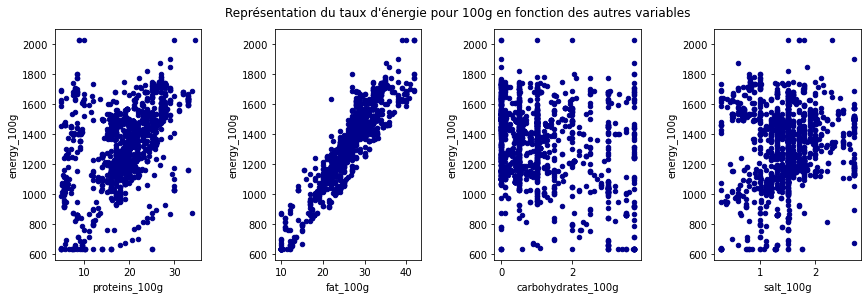

In [8]:
pl.figure(figsize = (14,4))
pl.suptitle("Représentation du taux d'énergie pour 100g en fonction des autres variables")
ax1 = pl.subplot(1,4,1)
dfRaw.plot.scatter(x='proteins_100g', y='energy_100g', c='DarkBlue', ax=ax1)
#pl.ylabel(None)
ax2 = pl.subplot(1,4,2)
dfRaw.plot.scatter(x='fat_100g', y='energy_100g', c='DarkBlue', ax=ax2)
#pl.ylabel(None)
ax3 = pl.subplot(1,4,3)
dfRaw.plot.scatter(x='carbohydrates_100g', y='energy_100g', c='DarkBlue', ax=ax3)
#pl.ylabel(None)
ax4 = pl.subplot(1,4,4)
dfRaw.plot.scatter(x='salt_100g', y='energy_100g', c='DarkBlue', ax=ax4)
#pl.ylabel(None)
pl.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.2)
pl.show()

On va representer maintenant le taux de sel en fonction des autres variables

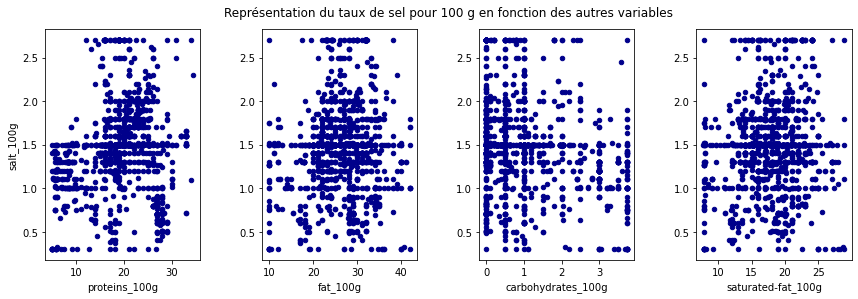

In [9]:
pl.figure(figsize = (14,4))
pl.suptitle("Représentation du taux de sel pour 100 g en fonction des autres variables")
ax1 = pl.subplot(1,4,1)
dfRaw.plot.scatter(x='proteins_100g', y='salt_100g', c='DarkBlue', ax=ax1)
#pl.ylabel(None)
ax2 = pl.subplot(1,4,2)
dfRaw.plot.scatter(x='fat_100g', y='salt_100g', c='DarkBlue', ax=ax2)
pl.ylabel(None)
ax3 = pl.subplot(1,4,3)
dfRaw.plot.scatter(x='carbohydrates_100g', y='salt_100g', c='DarkBlue', ax=ax3)
pl.ylabel(None)
ax4 = pl.subplot(1,4,4)
dfRaw.plot.scatter(x='saturated-fat_100g', y='salt_100g', c='DarkBlue', ax=ax4)
pl.ylabel(None)
pl.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
pl.show()

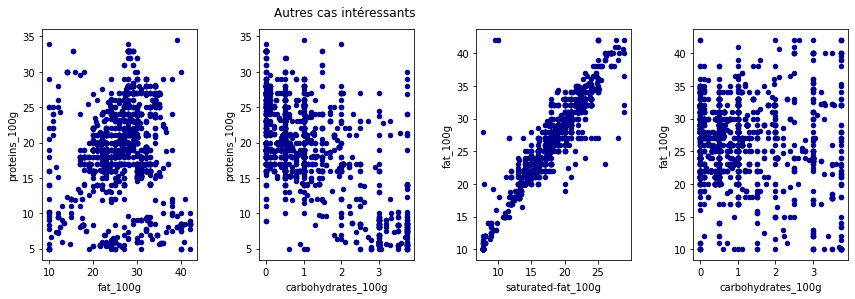

In [10]:
pl.figure(figsize = (14,4))
pl.suptitle("Autres cas intéressants",x=0.40)
ax1 = pl.subplot(1,4,1)
dfRaw.plot.scatter(x='fat_100g', y='proteins_100g', c='DarkBlue', ax=ax1)
#pl.ylabel(None)
ax2 = pl.subplot(1,4,2)
dfRaw.plot.scatter(x='carbohydrates_100g', y='proteins_100g', c='DarkBlue', ax=ax2)
#pl.ylabel(None)
ax3 = pl.subplot(1,4,3)
dfRaw.plot.scatter(x='saturated-fat_100g', y='fat_100g', c='DarkBlue', ax=ax3)
#pl.ylabel(None)
ax4 = pl.subplot(1,4,4)
dfRaw.plot.scatter(x='carbohydrates_100g', y='fat_100g', c='DarkBlue', ax=ax4)
#pl.ylabel(None)
pl.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.2)
pl.show()

### 4. Analyse multivarié

#### Heat Map

On affiche une Heat Map des correlations entres les variables quantitatives

On crée deux data frame resuit l'un avec toutes les variables non informatives et l'autre avec seulement les variables quantitatives (le precedent sans le nutriscore)

In [11]:
dfReduc = dfRaw.drop(['code','product_name','categories_fr'],axis=1)
dfQuant = dfReduc.drop(['nutrition_grade_fr'],axis=1)

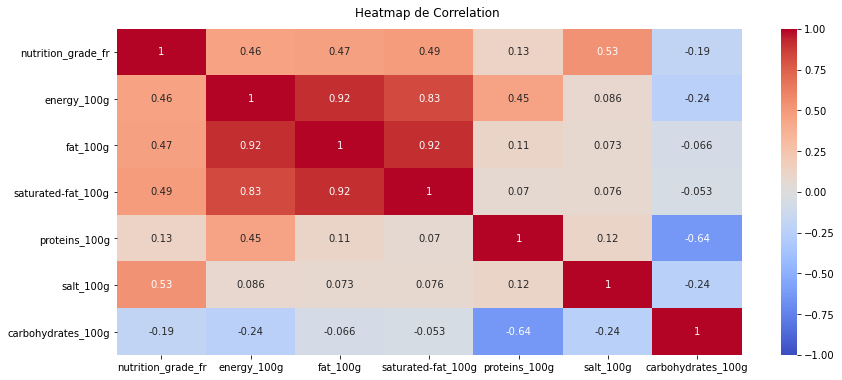

In [12]:
import seaborn as sns
pl.figure(figsize=(14, 6))


heatmap = sns.heatmap(dfReduc.corr(),vmin=-1, vmax=1, annot=True, cmap='coolwarm');
heatmap.set_title('Heatmap de Correlation ', fontdict={'fontsize':12}, pad=12);

#### ACP

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

On split les data pour les mettre au format NumPy

In [14]:
X = dfReduc.to_numpy()
X.shape
index = dfReduc.index
columns = dfReduc.columns

On les met à l'echelle et on fait le fit

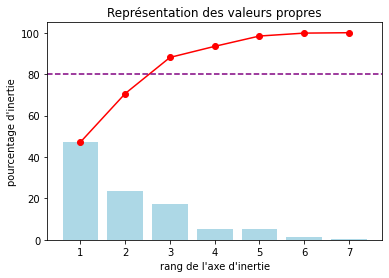

In [15]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

pca = PCA()
pca.fit(X_scaled)

scree = (pca.explained_variance_ratio_*100).round(2)
screeCum = scree.cumsum()
x_list = list(range(1, len(scree) +1))
pl.bar(x_list, scree,color='lightblue')
pl.plot(x_list, screeCum,c='red',marker='o')
pl.axhline(y=80,color='purple',linestyle='dashed')
pl.xlabel("rang de l'axe d'inertie")
pl.ylabel("pourcentage d'inertie")
pl.title("Représentation des valeurs propres")
#pl.legend()
pl.show(block=False)

Fonction pour afficher le cercle des corrélations

In [16]:
def correlation_graph(pca, x_y, features) :
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = pl.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        pl.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])

    # Affichage des lignes horizontales et verticales
    pl.plot([-1, 1], [0, 0], color='grey', ls='--')
    pl.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    pl.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    pl.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    pl.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    pl.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    pl.axis('equal')
    pl.show(block=False)

On affiche le cercle pour F1 et F2

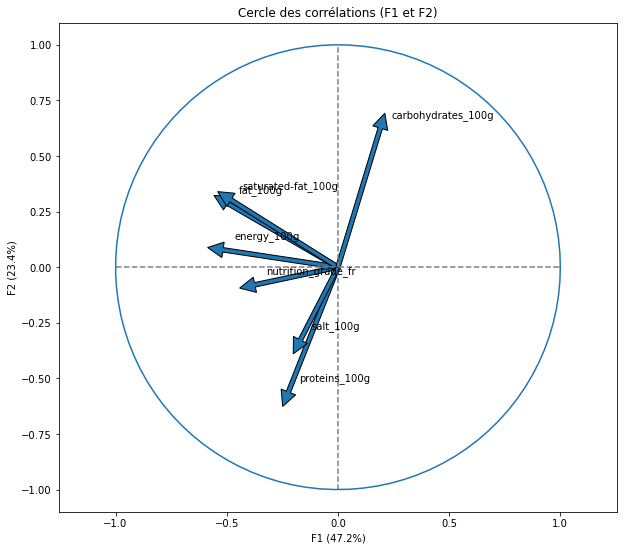

In [17]:
x_y = (0,1)
correlation_graph(pca, x_y, columns)

On affiche le cercle pour F3 et F4

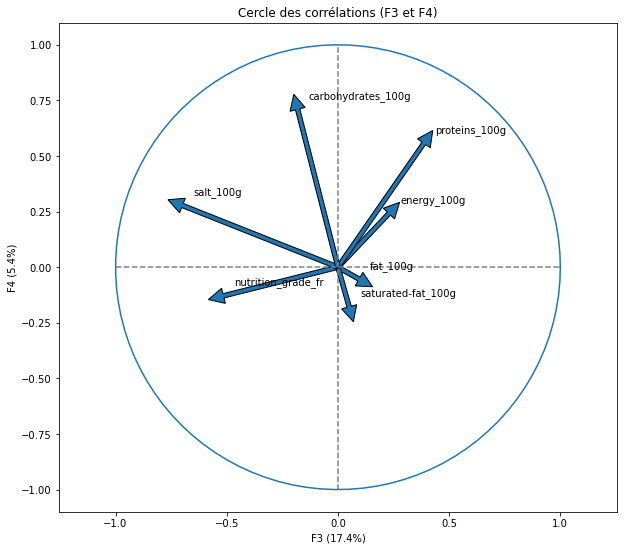

In [18]:
x_y = (2,3)
correlation_graph(pca, x_y, columns)

On affiche le cercle pour F1 et F3

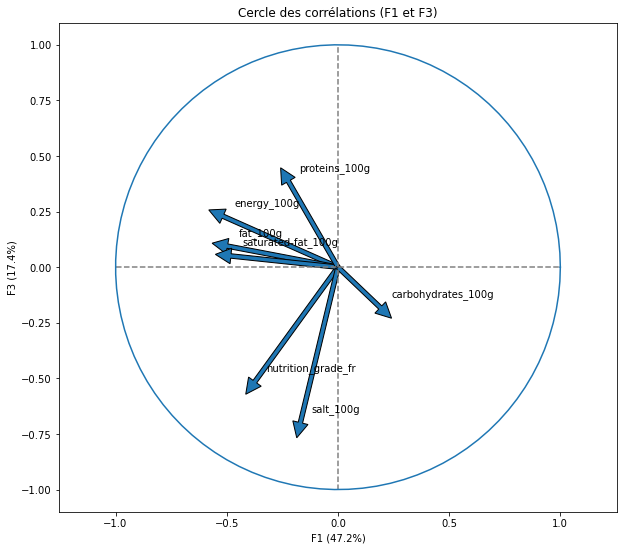

In [19]:
x_y = (0,2)
correlation_graph(pca, x_y, columns)

On affiche le cercle pour F2 et F3

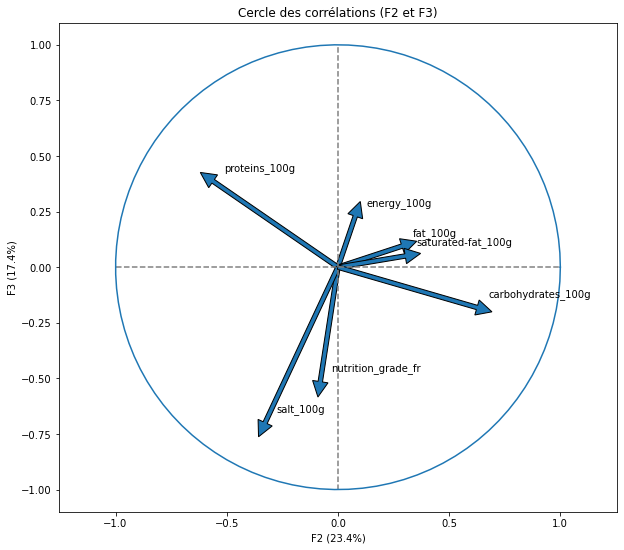

In [20]:
x_y = (1,2)
correlation_graph(pca, x_y, columns)

On affiche les nouvelles composantes en fonction des anciennes composantes

In [21]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
pcs.columns = columns
pcs.index = [f"F{i}" for i in x_list]
pcs

,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,carbohydrates_100g
F1,-0.373534,-0.516872,-0.497083,-0.481489,-0.222816,-0.168866,0.190342
F2,-0.079368,0.077959,0.287728,0.302610,-0.561279,-0.327417,0.625322
F3,-0.514752,0.229127,0.094760,0.050362,0.386284,-0.699243,-0.181272
F4,-0.128728,0.241007,-0.053536,-0.178096,0.556996,0.277392,0.709626
F5,-0.755445,0.055511,0.197316,0.158617,-0.196111,0.545778,-0.160612
F6,0.040549,0.386193,0.410118,-0.781880,-0.248673,-0.018994,-0.086483
F7,-0.017087,0.681144,-0.671674,0.076453,-0.274885,0.012690,-0.055117


#### ANOVA

In [22]:
import scipy.stats as ss

On remet les variables [A-E] initiale en lieu et place des valeurs numériques

In [23]:
dfReduc['nutrition_grade_fr'].replace({0:'a',1:'b',2:'c',3:'d',4:'e'},inplace=True)
dfReduc.head()

,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,proteins_100g,salt_100g,carbohydrates_100g
13537,d,1681.0,33.0,20.1,23.8,1.780,3.00
27419,e,1640.0,32.1,17.9,21.4,2.450,3.57
99796,d,1670.0,40.0,26.7,10.0,1.520,3.33
111081,d,1684.0,33.8,22.3,25.5,2.286,0.00
111663,c,1016.0,19.0,13.0,18.0,0.500,1.50


In [24]:
Fstat = []
pVal = []

for name in cols :
    F, p = ss.f_oneway(dfReduc[name][dfReduc['nutrition_grade_fr'] == 'a'],
                       dfReduc[name][dfReduc['nutrition_grade_fr'] == 'b'],
                       dfReduc[name][dfReduc['nutrition_grade_fr'] == 'c'],
                       dfReduc[name][dfReduc['nutrition_grade_fr'] == 'd'],
                       dfReduc[name][dfReduc['nutrition_grade_fr'] == 'e'])
    Fstat.append(F)
    pVal.append(p)

In [25]:
for i in range(0,len(Fstat)):
    print('{}             Fstat={} pValue={} '.format(cols[i], round(Fstat[i],1) ,pVal[i]))

energy_100g             Fstat=132.1 pValue=1.5604312068061177e-98 
fat_100g             Fstat=143.1 pValue=1.0321237223543786e-105 
saturated-fat_100g             Fstat=150.5 pValue=1.5665541330348523e-110 
proteins_100g             Fstat=8.0 pValue=2.182919793696558e-06 
salt_100g             Fstat=221.3 pValue=1.918070080522749e-153 
carbohydrates_100g             Fstat=18.5 pValue=7.375634490222165e-15 


Résultat sous forme de dataframe

In [26]:
H0Status = ['Rejeté' if value < 0.05 else 'Accepté' for value in pVal]

statusSerie = pd.Series(H0Status)
fstatSerie = pd.Series(Fstat)
pvalSerie = pd.Series(pVal)

fstatSerie.index = cols
pvalSerie.index = cols
statusSerie.index = cols

ResultAnova = pd.DataFrame({'FStat': fstatSerie,'pValue': pvalSerie, 'Status de H0': statusSerie})
ResultAnova

,FStat,pValue,Status de H0
energy_100g,132.123111,1.560431e-98,Rejeté
fat_100g,143.063798,1.032124e-105,Rejeté
saturated-fat_100g,150.524173,1.566554e-110,Rejeté
proteins_100g,7.998535,2.182920e-06,Rejeté
salt_100g,221.331413,1.918070e-153,Rejeté
carbohydrates_100g,18.451015,7.375634e-15,Rejeté
